In [10]:
MY_SECRET_KEY="MY_SECRET_KEY"

In [11]:
%pip install ultralytics
%pip install roboflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import ultralytics
from roboflow import Roboflow
from ultralytics import YOLO
from IPython.display import Image


In [13]:
rf = Roboflow(api_key=MY_SECRET_KEY)
project = rf.workspace("-jwzpw").project("continuous_fire")
dataset = project.version(6).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.27, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to continuous_fire-6 in yolov8:: 100%|██████████| 5030/5030 [00:02<00:00, 1985.94it/s]


In [43]:
!yolo task=detect mode=train model=yolov8s.pt data=continuous_fire-6/data.yaml epochs=1 imgsz=640 plots=True

Ultralytics YOLOv8.1.27 🚀 Python-3.11.1 torch-2.2.1+cpu CPU (AMD Ryzen 7 5800HS with Radeon Graphics)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=continuous_fire-6/data.yaml, epochs=1, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train15, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show


  0%|          | 0.00/755k [00:00<?, ?B/s]
 33%|███▎      | 248k/755k [00:00<00:00, 2.40MB/s]
100%|██████████| 755k/755k [00:00<00:00, 4.88MB/s]

train: Scanning D:\AI_HK232\continuous_fire-6\train\labels...:   0%|          | 0/1004 [00:00<?, ?it/s]
train: Scanning D:\AI_HK232\continuous_fire-6\train\labels... 215 images, 1 backgrounds, 0 corrupt:  21%|██▏       | 215/1004 [00:00<00:00, 2145.52it/s]
train: Scanning D:\AI_HK232\continuous_fire-6\train\labels... 457 images, 1 backgrounds, 0 corrupt:  46%|████▌     | 457/1004 [00:00<00:00, 2306.75it/s]
train: Scanning D:\AI_HK232\continuous_fire-6\train\labels... 727 images, 1 backgrounds, 0 corrupt:  72%|███████▏  | 727/1004 [00:00<00:00, 2482.04it/s]
train: Scanning D:\AI_HK232\continuous_fire-6\train\labels... 993 images, 2 backgrounds, 0 corrupt:  99%|█████████▉| 993/1004 [00:00<00:00, 2550.53it/s]
train: Scanning D:\AI_HK232\continuous_fire-6\train\labels... 1004 images, 2 backgrounds, 0 corrupt: 100%|██████████| 1004/1004 [00:00<00

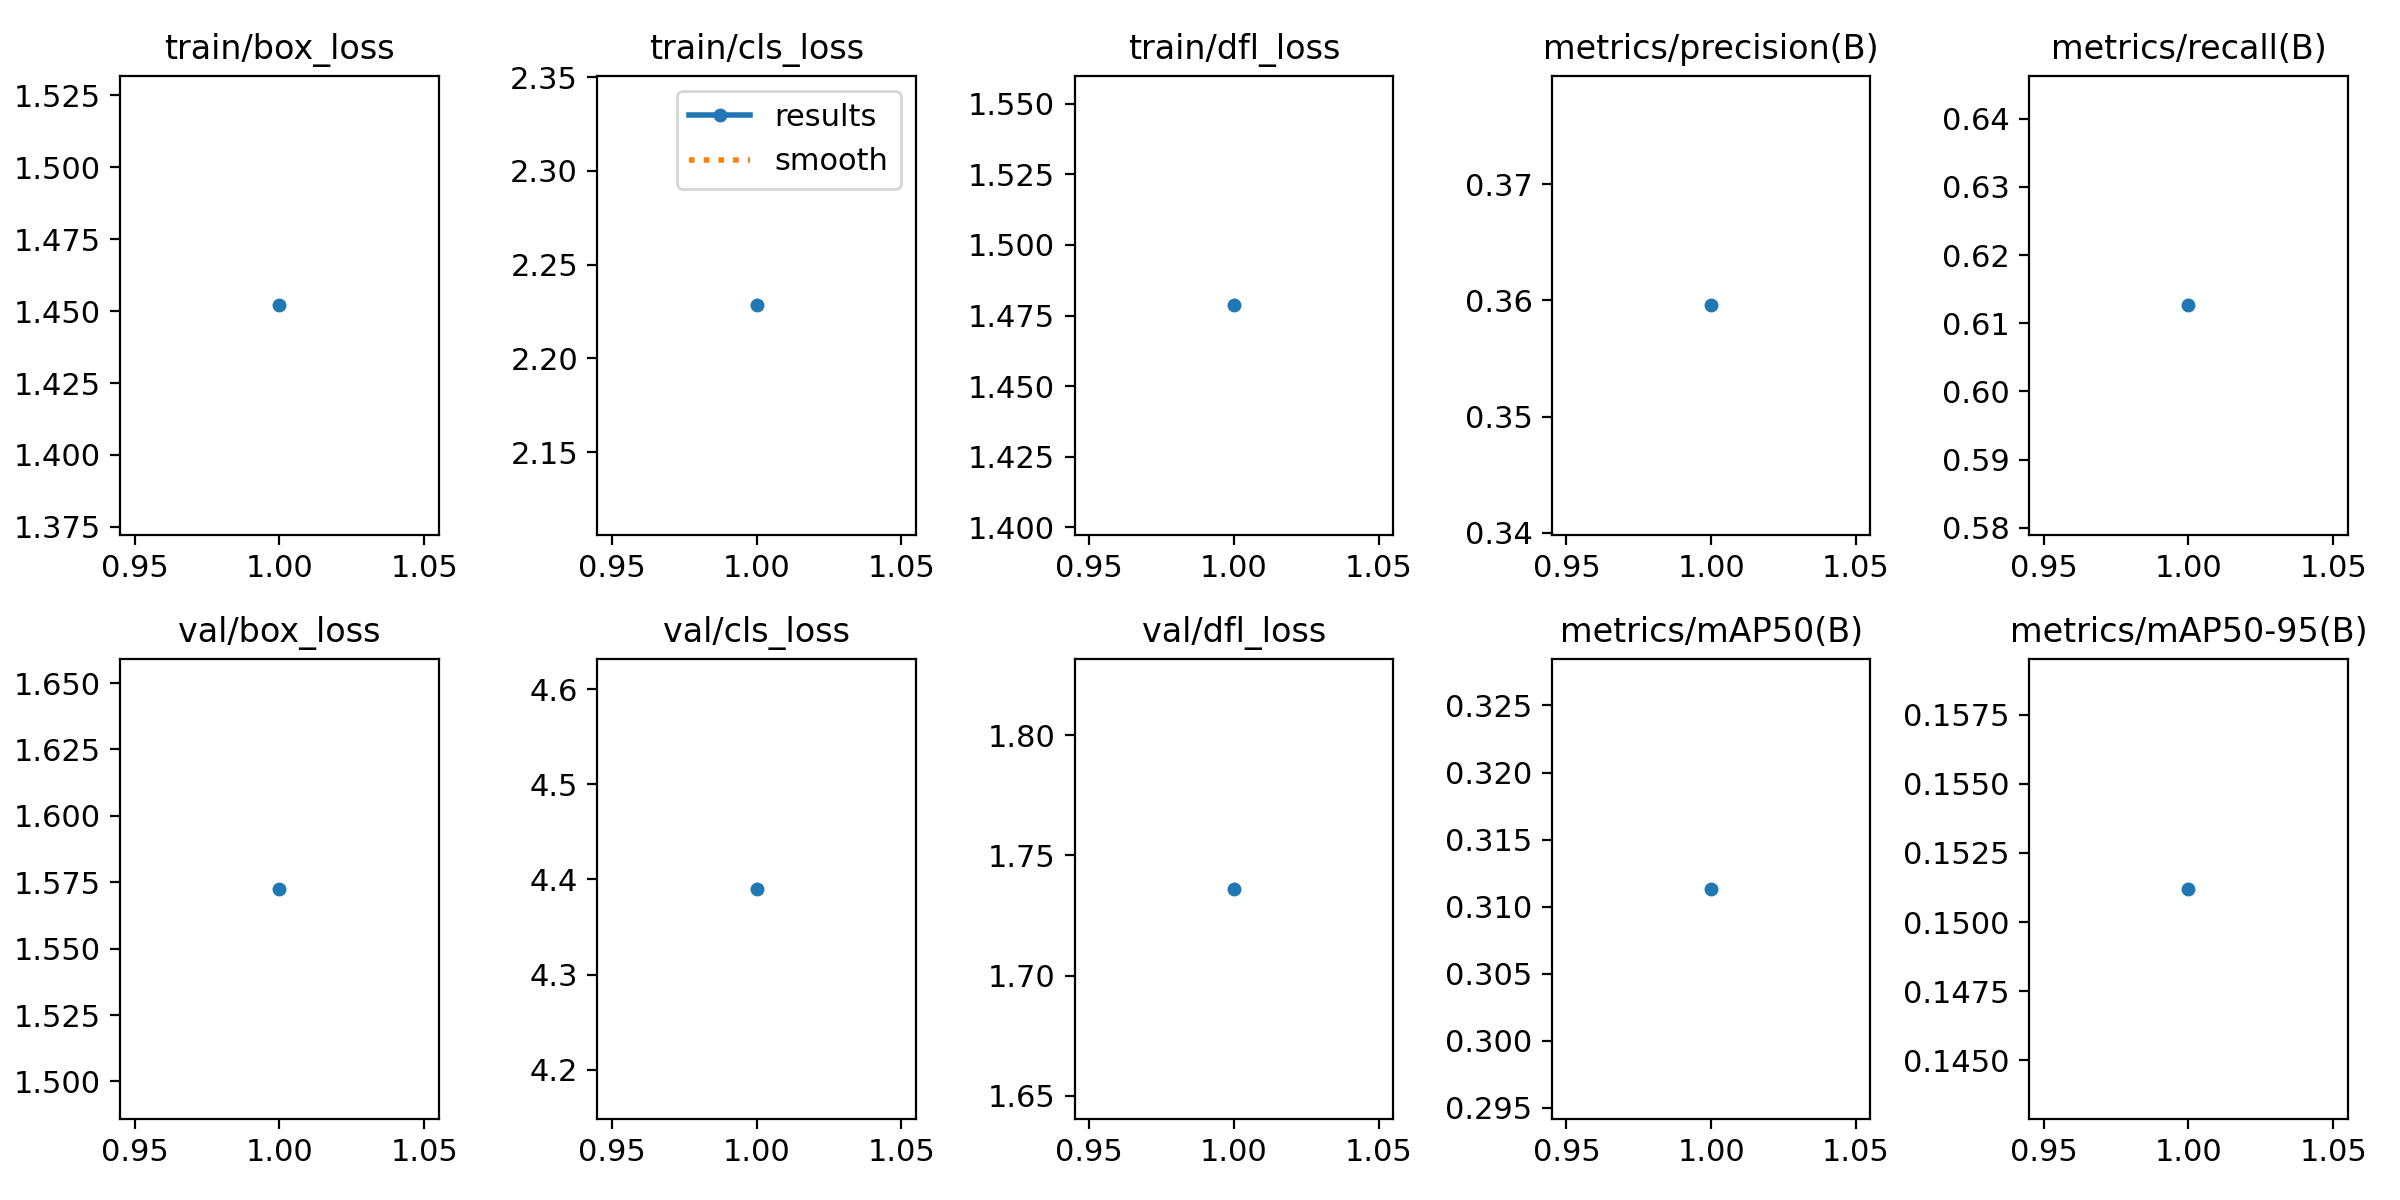

In [46]:
# VIEW MODEL TRANING CHARTS
Image(filename=f'runs/detect/train15/results.png', width=600)

In [48]:
# VALIDATION
!yolo task=detect mode=val model=runs/detect/train15/weights/best.pt data=continuous_fire-6/data.yaml

Ultralytics YOLOv8.1.27 🚀 Python-3.11.1 torch-2.2.1+cpu CPU (AMD Ryzen 7 5800HS with Radeon Graphics)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
                   all        754        950      0.361      0.613      0.312      0.151
Speed: 1.6ms preprocess, 182.2ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs\detect\val
💡 Learn more at https://docs.ultralytics.com/modes/val



val: Scanning D:\AI_HK232\continuous_fire-6\valid\labels.cache... 754 images, 2 backgrounds, 0 corrupt: 100%|██████████| 754/754 [00:00<?, ?it/s]
val: Scanning D:\AI_HK232\continuous_fire-6\valid\labels.cache... 754 images, 2 backgrounds, 0 corrupt: 100%|██████████| 754/754 [00:00<?, ?it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/48 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   2%|▏         | 1/48 [00:02<02:20,  3.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   4%|▍         | 2/48 [00:06<02:22,  3.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   6%|▋         | 3/48 [00:09<02:18,  3.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   8%|▊         | 4/48 [00:13<02:37,  3.58s/it]
                 Class     Im